In [1]:
# ---------------------------- #
#     Fix import structure     #
# ---------------------------- #
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
module_path = os.path.abspath('../../..')
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from examples.RTP.env import RTP
from examples.RTP.main import run_game, create_models

# ---------------------------- #
#    Run game test with viz    #
# ---------------------------- #

parameters = {
    'world_size': 20, # Size of the environment
    'num_models': 1, # Number of agents. Right now, only supports 1
    'sync_freq': 200, # Parameters related to model soft update. TODO: Figure out if these are still needed
    'model_update_freq': 4, # Parameters related to model soft update. TODO: Figure out if these are still needed 
    'epsilon': 0.3, # Exploration parameter
    'conditions': ['EWA'], # Model run conditions
    'epsilon_decay': 0.999, # Exploration decay rate
    'episodic_decay_rate': 20.0, # EWA episodic decay rate
    'similarity_decay_rate': 20.0,
    'epochs': 500, # Number of epochs
    'max_turns': 20, # Number of turns per game
    'object_memory_size': 12000, # Size of the memory buffer
    'knn_size': 5, # Size of the nearest neighbours
    'RUN_PROFILING': False, # Whether to time each epoch
    'log': False, # Tensorboard support. Currently disabled
    'contextual': True, # Whether the agents' need changes based on its current resource value or stays static
    'appearance_size': 20
}

# Run model with all of the conditions
for condition in range(len(parameters['conditions'])):
        all_models = create_models(
            appearance_size = parameters['appearance_size'],
            episodic_decay_rate = parameters['episodic_decay_rate'],
            similarity_decay_rate = parameters['similarity_decay_rate'],
            knn_size = parameters['knn_size']
        )

        env = RTP(
            height=parameters['world_size'],
            width=parameters['world_size'],
            layers=1,
            contextual=parameters['contextual']
        )

        all_models, env = run_game(
            all_models,
            env,
            epsilon=parameters['epsilon'],
            epochs=parameters['epochs'],
            max_turns=parameters['max_turns'],
            epsilon_decay=parameters['epsilon_decay'],
            condition=parameters['conditions'][condition],
            sync_freq=parameters['sync_freq'],
            model_update_freq=parameters['model_update_freq'],
            RUN_PROFILING=parameters['RUN_PROFILING']
        )

Fixing import structure...
20 21 -70 [4, 12, 110] 208.4518958926201 0.2937626027894116 0 EWA
40 21 -12 [3, 15, 42] 295.418276488781 0.28794283215752287 0 EWA
60 21 66 [7, 15, 4] 282.91120359301567 0.2822383577882836 0 EWA
80 21 69 [7, 15, 1] 257.7492200732231 0.27664689553184973 0 EWA
100 21 72 [8, 19, 8] 204.4524204134941 0.2711662064899787 0 EWA
120 21 43 [5, 9, 7] 163.40108779072762 0.26579409611954335 0 EWA
140 21 75 [9, 20, 15] 146.56999769806862 0.2605284133538074 0 EWA
160 21 36 [5, 21, 14] 138.20852652192116 0.2553670497411083 0 EWA
180 21 96 [10, 23, 4] 144.40096426010132 0.25030793860060435 0 EWA
200 21 99 [10, 20, 1] 149.72039330005646 0.2453490541947473 0 EWA
220 21 172 [18, 30, 8] 307.28856909275055 0.24048841091814935 0 EWA
240 21 95 [10, 17, 5] 276.11522471904755 0.23572406250251945 0 EWA
260 21 110 [12, 27, 10] 252.34197866916656 0.23105410123735085 0 EWA
280 21 159 [16, 23, 1] 228.53713071346283 0.22647665720604732 0 EWA
300 21 181 [19, 30, 9] 287.5132839679718 0.22198

KeyboardInterrupt: 

Took action: right. Received 0.


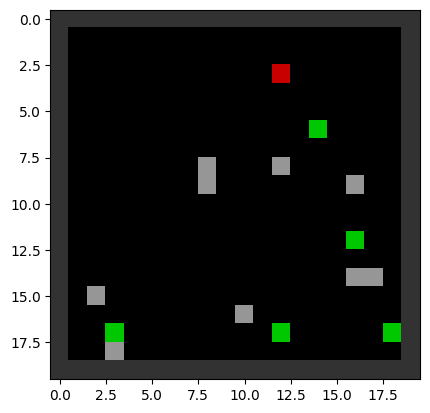

Game over. Received 20 total reward.


In [ ]:
from examples.RTP.utils import run_one_game

run_one_game(
    all_models,
    condition='None',
    env=env,
    max_turns=20,
    save = False,
    run_id=2
)